## Introduction

Ever wondered how internet provides search results about the topic of interest?

Let's say you searched for "movie automatic shoe laces" and it brings up "Back to the future".

Has the search engine watched the movie? No, but it knows from lots of other searches what people are probably looking for.

And it calculates that probability using Bayes' Theorem.

Bayes' Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

##  Problem Statement

- **USA Leading Bank**, provides **Multiple products and services** to its customers.

- Bank having corpus balance and they wanted to scale  **Personal loan business** to boost their Assets base. 

- **Bank is running the campaign to reach out the existing saleried customers with Personal Loan Product offering.**

- As of now only **9.60% customer** have accepted the offer. Response to the campaign is below expectations.

- Bank targeting the customers who have already cosuming the Asset product like **Credit Cards and Mortgage loans.**

- Bank is also targeting customers who have not taken any loans but having banking relationship and using othe product like **Securities Account & CD Account.**

- Looking after below par response to the campaign bank wanted to **analyse key factors to improve personal loan business and make this campaign successful.**

- Below are the features provided for the analysis.

Personal Loan - Did this customer accept the personal loan offered in the last campaign? **This is our target variable**

Securities Account - Customer have a securities account with the bank

CD Account - Customer have a certificate of deposit (CD) account with the bank

Online - Customer using internet banking facilities

Credit Card - Customer using a credit card issued by Bank

Age - Age of the customer

Experience - Years of experience

Income - Annual income in dollars

CCAvg - Average credit card spending

Mortage - Value of House Mortgage

Family - Family size of the customer

Education - Education level of the customer

## Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns
import warnings 
import warnings
warnings.filterwarnings("ignore")

## Data Acquisition & Description

In [2]:
df_loan= pd.read_csv("https://raw.githubusercontent.com/ajaykini25/PersonalLoanPrediction/main/Bank_Personal_Loan_Modelling-1.csv")
df_loan.shape

(5000, 14)

In [3]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations:**
- The experience column is having minimum values in range of -1,-2-3. This needs to be checked and process.
- Mortgage is positively skewed.

## Data Pre-Processing

## Data Cleaning

In [6]:
# Dropping the redudant columns which are not much significance. 
df_loan.drop(['ID','ZIP Code'], axis=1, inplace=True)

In [7]:
df_loan.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### There are some negative values in the "Experience" column.

In [8]:
df_loan[df_loan['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


**Since Income vs Experience is critical factor while making any credit decision. Hence checking the mean of the negative values in Experience before treating the negative values**

In [9]:
df_loan.groupby(by= 'Experience' )['Income'].mean()

Experience
-3     68.250000
-2     82.466667
-1     64.454545
 0     69.651515
 1     74.472973
 2     80.258824
 3     82.449612
 4     74.000000
 5     76.527397
 6     78.159664
 7     72.148760
 8     75.050420
 9     75.959184
 10    72.576271
 11    71.525862
 12    82.303922
 13    77.452991
 14    68.921260
 15    76.352941
 16    74.047244
 17    76.800000
 18    75.715328
 19    74.762963
 20    89.182432
 21    80.292035
 22    83.790323
 23    71.590278
 24    72.236641
 25    68.063380
 26    73.753731
 27    67.472000
 28    72.514493
 29    68.201613
 30    67.896825
 31    67.884615
 32    66.285714
 33    69.333333
 34    62.824000
 35    70.265734
 36    72.289474
 37    68.663793
 38    75.363636
 39    73.694118
 40    74.754386
 41    85.418605
 42    50.125000
 43    75.000000
Name: Income, dtype: float64

In [10]:
df_loan['Experience'][df_loan['Experience'] <0]= df_loan['Experience'].median(0)

**For the Experience Feature:**

**Mean= 20.10 and Median= 20**

**Mean value Experience vs Income is:**

**-1     64.454545**

**-2     82.466667**

**-3     68.250000**



**Mean value of Income is 73.774200**

**I have replaced the -1,-2 & -3 values in the experience column with the Median, because as per above observation we can notice that mean of negative values are closest to range of mean value to Income feature**

In [11]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


- Checked for the missing values in the dataset if there any. 
- As we have treated the experience column now data looks clean.

In [12]:
df_loan.skew()

Age                  -0.029341
Experience           -0.014100
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

**A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.**

**Observations**
- **From the above distribution plot and quantile range study we can illustrate that Income,family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Credit Card are Positively skewed**.

- **Age,Experience,ZIP Code,Online columns are Negative skewed**


## Exploaratory Data analysis

#### What is the distribution of the target variable ?

In [13]:
df_loan['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

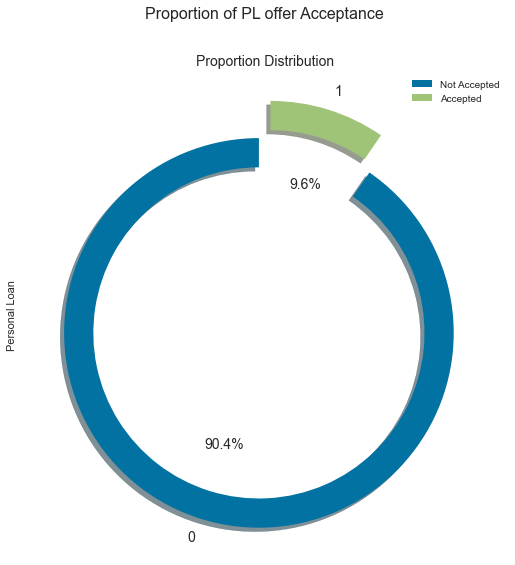

In [91]:
fig = plt.figure(figsize = [15, 8])

space = np.ones(2)/10

df_loan['Personal Loan'].value_counts().plot(kind = 'pie',explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 90, legend = True,)
plt.legend(['Not Accepted', 'Accepted'])
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Proportion of PL offer Acceptance', y = 1.02, size = 16)
plt.show()

### Let's check the distribution of independent variables distribution with respect to Target Variable

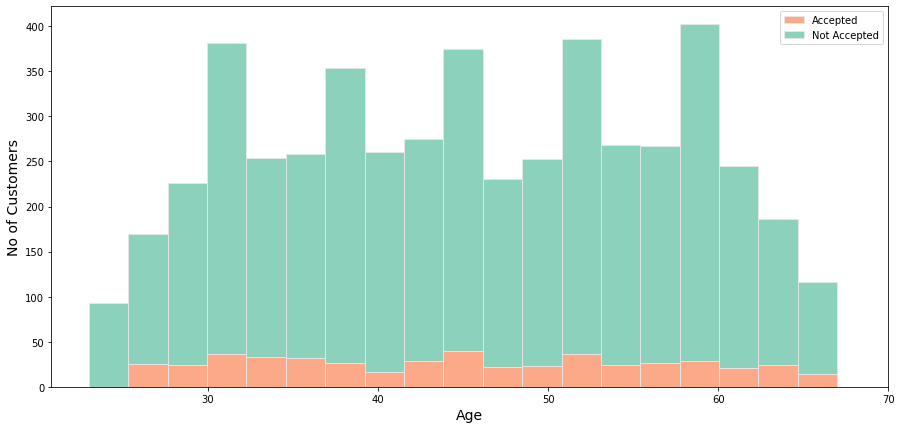

In [23]:
figure = plt.figure(figsize=[15, 7])
sns.histplot(df_loan,x="Age", hue="Personal Loan", multiple="stack", 
             palette="Set2", edgecolor=".9",linewidth=.9)
plt.xlabel(xlabel='Age', size = 14)
plt.ylabel(ylabel='No of Customers', size = 14)
plt.xticks(ticks= np.arange(30,80,10))
plt.legend(['Accepted', 'Not Accepted'])
plt.show()

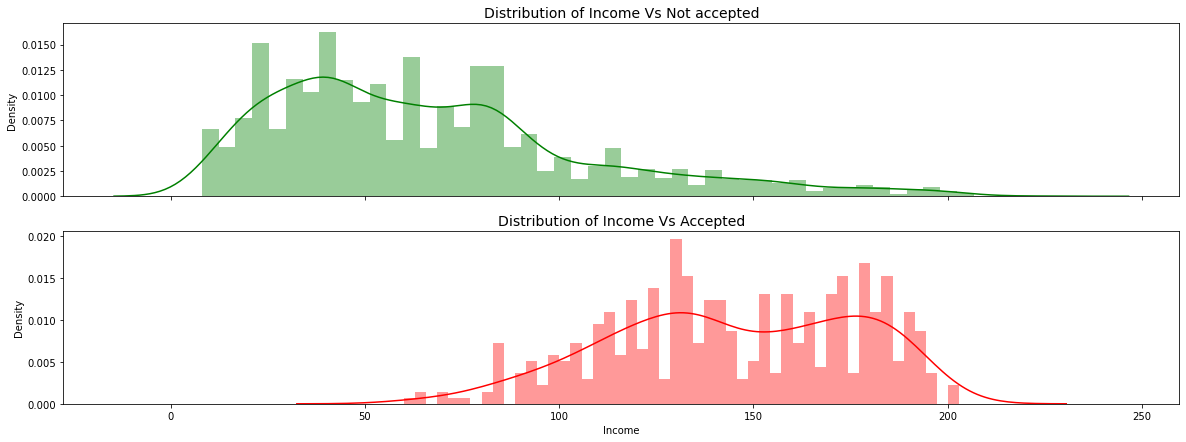

In [24]:
# Slicing data with Not_accepted status
Not_accepted = df_loan['Income'][df_loan['Personal Loan'] == 0]

# Slicing data with accepted transactions
accepted = df_loan['Income'][df_loan['Personal Loan'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Not_accepted, bins = 50, ax = ax1, color = 'green')
ax1.set_title(label = 'Distribution of Income Vs Not accepted', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = accepted, bins = 50, ax = ax2, color = 'red')
ax2.set_title(label = 'Distribution of Income Vs Accepted', size = 14)
plt.show()


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

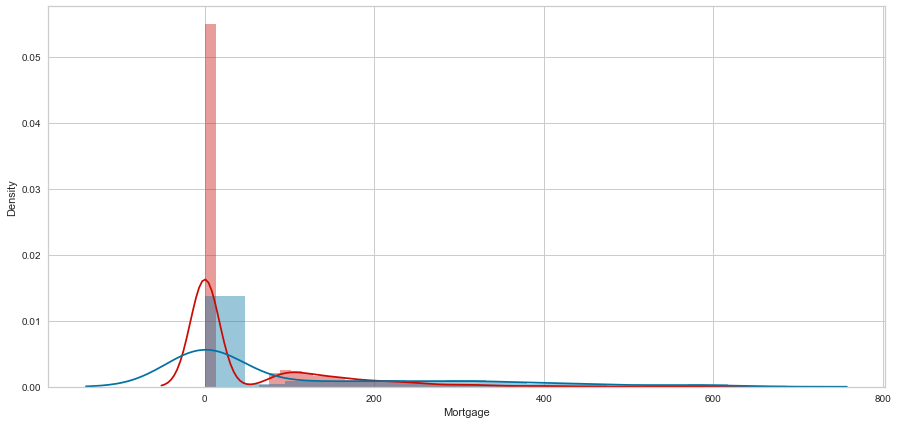

In [86]:
fig = plt.figure(figsize = [15, 7])
sns.distplot(df_loan[df_loan['Personal Loan'] == 0]['Mortgage'], color = 'r')
sns.distplot(df_loan[df_loan['Personal Loan'] == 1]['Mortgage'], color = 'b')

<AxesSubplot:xlabel='Personal Loan', ylabel='Density'>

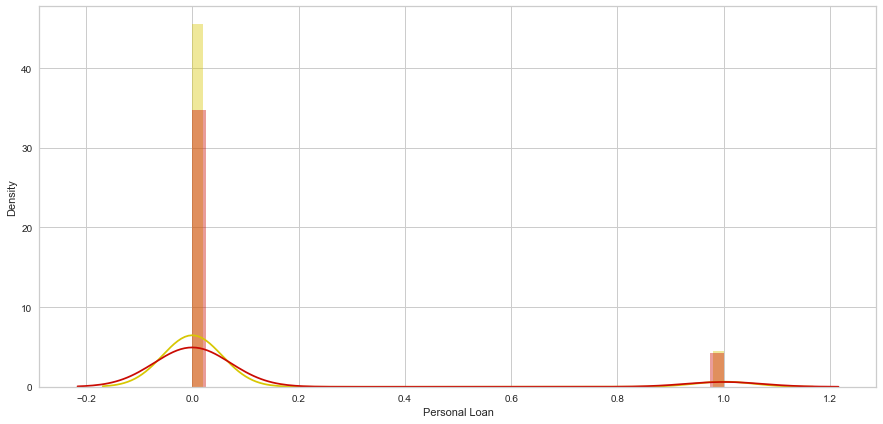

In [87]:
fig = plt.figure(figsize = [15, 7])
sns.distplot(df_loan[df_loan['Mortgage'] == 0]['Personal Loan'], color = 'y')
sns.distplot(df_loan[df_loan['Mortgage'] > 0]['Personal Loan'], color = 'r')

In [27]:
df_loan['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

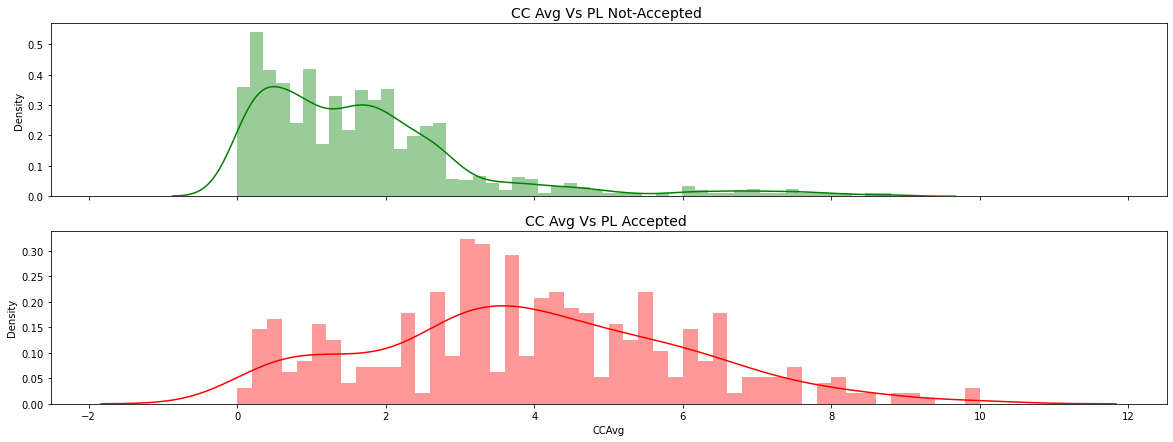

In [28]:
# Slicing data with respect to loan not accepted when cust not having mortgage facility
Not_accepted = df_loan[df_loan['Personal Loan'] == 0]['CCAvg']

# Slicing data with respect to loan accepted when customer not having mortgage facility
accepted = df_loan[df_loan['Personal Loan'] == 1]['CCAvg']
    
# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Not_accepted, bins = 50, ax = ax1, color = 'green')
ax1.set_title(label = 'CC Avg Vs PL Not-Accepted ', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = accepted, bins = 50, ax = ax2, color = 'red')
ax2.set_title(label = 'CC Avg Vs PL Accepted ', size = 14)
plt.show()

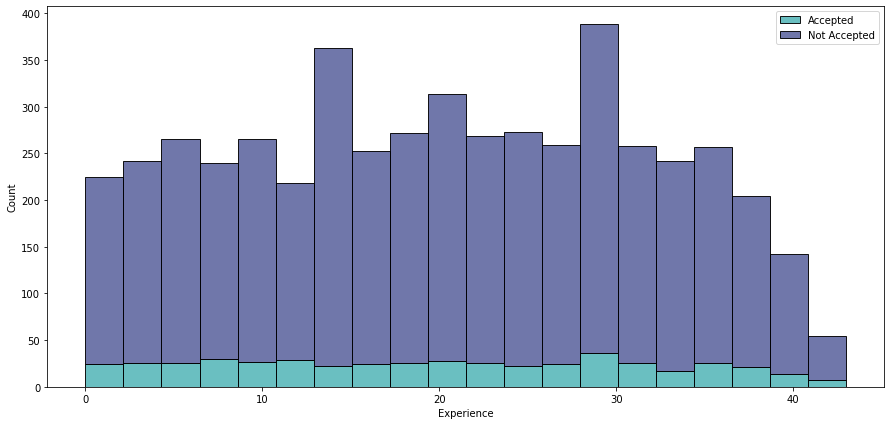

In [29]:
plt.figure(figsize=[15,7])
sns.histplot(df_loan,x="Experience", hue="Personal Loan",multiple="stack",palette="mako",linewidth=.9)
plt.legend(['Accepted', 'Not Accepted'])

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

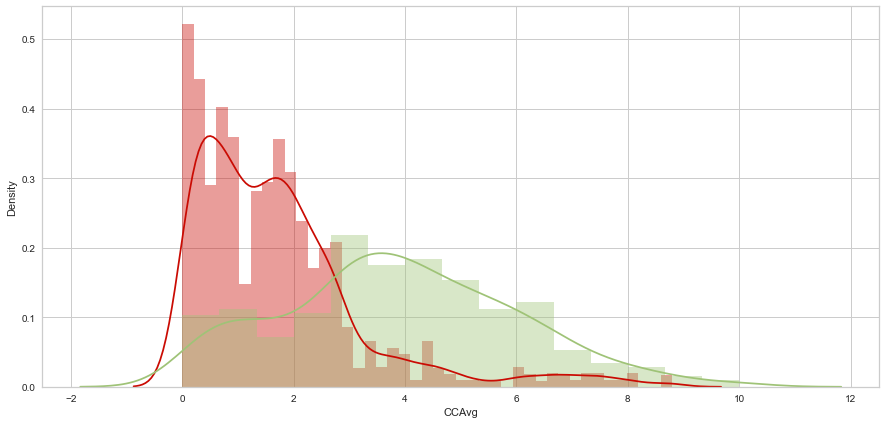

In [88]:
fig = plt.figure(figsize = [15, 7])
sns.distplot(df_loan[df_loan['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(df_loan[df_loan['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [31]:
df_loan.columns
features = ['Family','Education',
       'Securities Account', 'CD Account',
       'Online',]

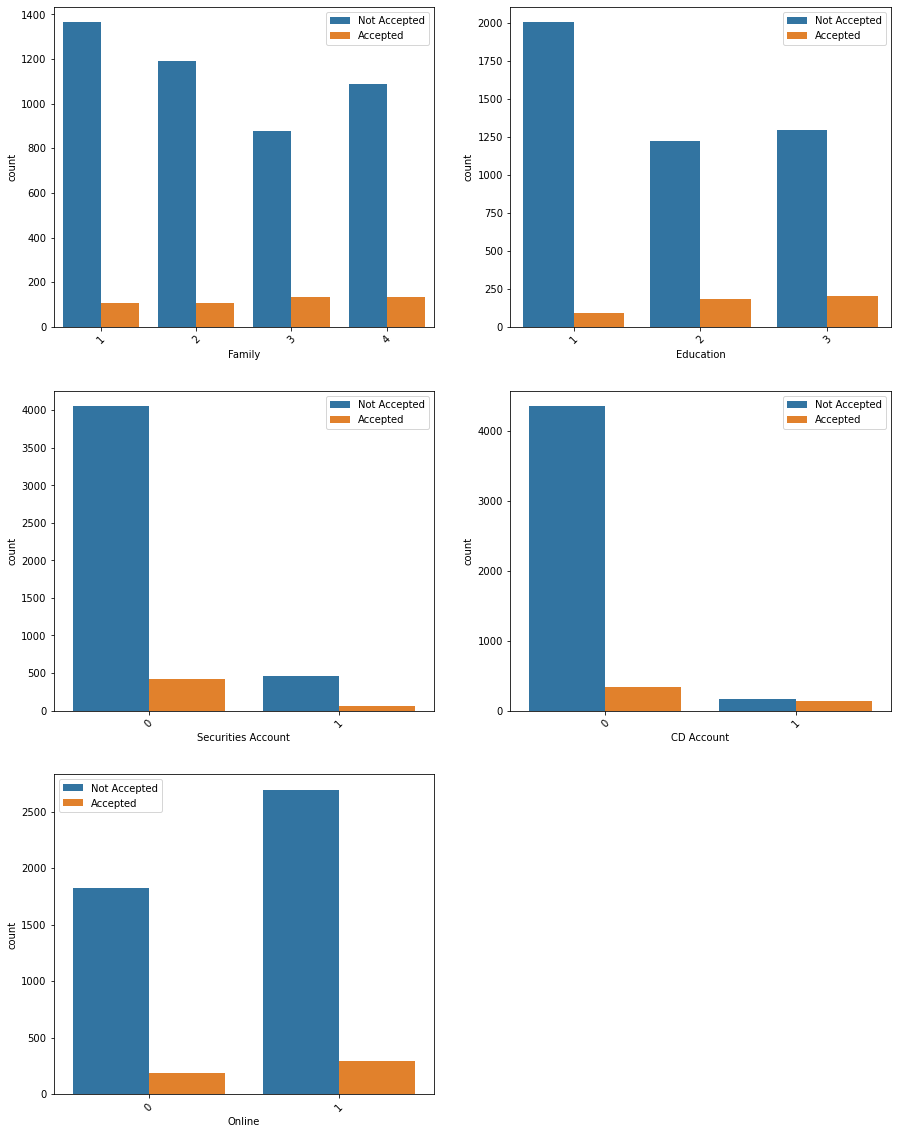

In [32]:
plt.figure(figsize = (15,20))
for i in enumerate(features):
    plt.subplot(3, 2,i[0]+1)
    sns.countplot(i[1], hue = 'Personal Loan', data = df_loan)
    plt.xticks(rotation=45)
    plt.legend(['Not Accepted', 'Accepted'])


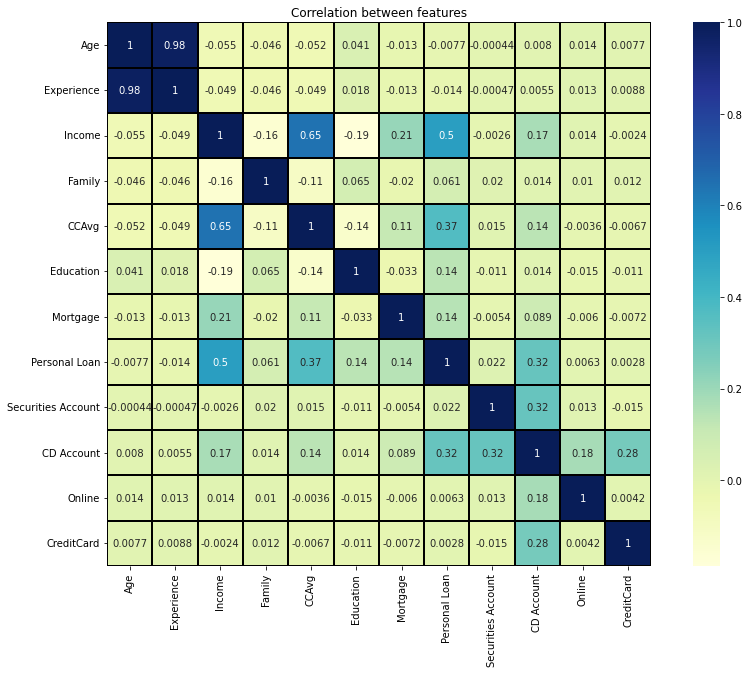

In [33]:
# Lets check co-relation between the features
plt.figure(figsize=(15,10))
sns.heatmap(data=df_loan.corr(), cmap="YlGnBu", annot=True, square=True,linewidth=.01,
           linecolor='black')
plt.title("Correlation between features")
plt.show()



### EDA Observations:

- The age group of customers opting for loan is between 25-65 years
- Income distribution of the customers is slightly right skewed. The range of income is between 8$ - 224$
- The low income group have not opted for personal loan, Whereas density for the liability customers is more in higher income group
- **Customer with family of 4 members have higher chances of opting for personal loan**
- The avg CC spending  of the customers who have not opted for personal loan is high in $ 0-5 range
- **The customers with no credit card have slightly more chances of opting for personal loan**
- **Customers with credit card who have high avg spending per month, have more chances of opting persona loan**
- **The count of customers, who are post graduate and who have applied for personal loan is more compared to 
rest of the graduates. This shows education can impact outcome of customers opting for personal loan**
- The liability customers seem to have no security account with the bank and still have opted for more personal loan 
#comapred to asset customers
- Count of customers having Mortgage not opted for loan is 1370, opted for loan 168
- Count of customers not having Mortgage not opted for loan 312, opted for loan 3150
- Customers with Certificate of deposit opting for personal loan is less compared to customers with no CD.
- Customers with online netbanking facility have more chances of opting for personal loan
- **Experience has a strong linear relationship with Age**



## Post Data Processing & Feature Selection


### X, y split

In [34]:
X = df_loan.drop('Personal Loan', axis=1)
X.shape

(5000, 11)

In [35]:
y = df_loan['Personal Loan']
y.shape

(5000,)

### Train Test Split

- Now we will split our data in training and testing part for further development.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 11), (1000, 11), (4000,), (1000,))

## Model Development & Evaluation

### Standard Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)


### KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [95]:
print (accuracy_score(y_train, y_pred_train_knn))
print (accuracy_score(y_test, y_pred_test_knn))

0.9597333333333333
0.9256


In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(7)
knn.fit(X_train,y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [97]:
print (accuracy_score(y_train, y_pred_train_knn))
print (accuracy_score(y_test, y_pred_test_knn))

0.9490666666666666
0.9208


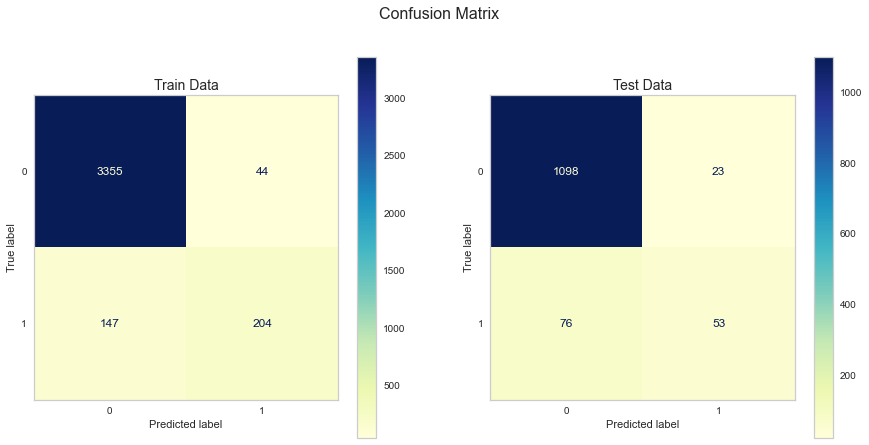

In [98]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = knn, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = knn, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

### Naive Bayes

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem.

It follows strong (naïve) independence assumptions between the features.

Before diving further let's get to know some important concepts that are realted to Naive Bayes.

In [38]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

In [39]:
naive.fit(X_train, y_train)

GaussianNB()

In [40]:
y_train_pred = naive.predict(X_train)
y_test_pred = naive.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [42]:
accuracy_score(y_train, y_train_pred)

0.8805

In [43]:
accuracy_score(y_test, y_test_pred)

0.894

## Model is underfitting

#### Since model is underfitting. Hence i am using Random forest Select from Model for improving the model performance

**SelectFromModel available in Sklearn which uses the base estimator to identify important features.**

The importance of feature is determined on the basis of threshold (a measure to calculate feature importance).

## Model 1

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [45]:
selector = SelectFromModel(RandomForestClassifier (n_estimators=100, random_state=42 ,n_jobs=-1,))

selector.fit(X,y)


SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=42))

In [46]:
selector.get_support()

array([False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [47]:
X.columns[selector.get_support()]

Index(['Income', 'Family', 'CCAvg', 'Education'], dtype='object')

In [48]:
#Converting it to a list
X.columns[selector.get_support()].tolist()

['Income', 'Family', 'CCAvg', 'Education']

In [49]:
features_selected = X.columns[selector.get_support()].tolist()
features_selected
len(features_selected)

4

In [50]:
!pip install yellowbrick

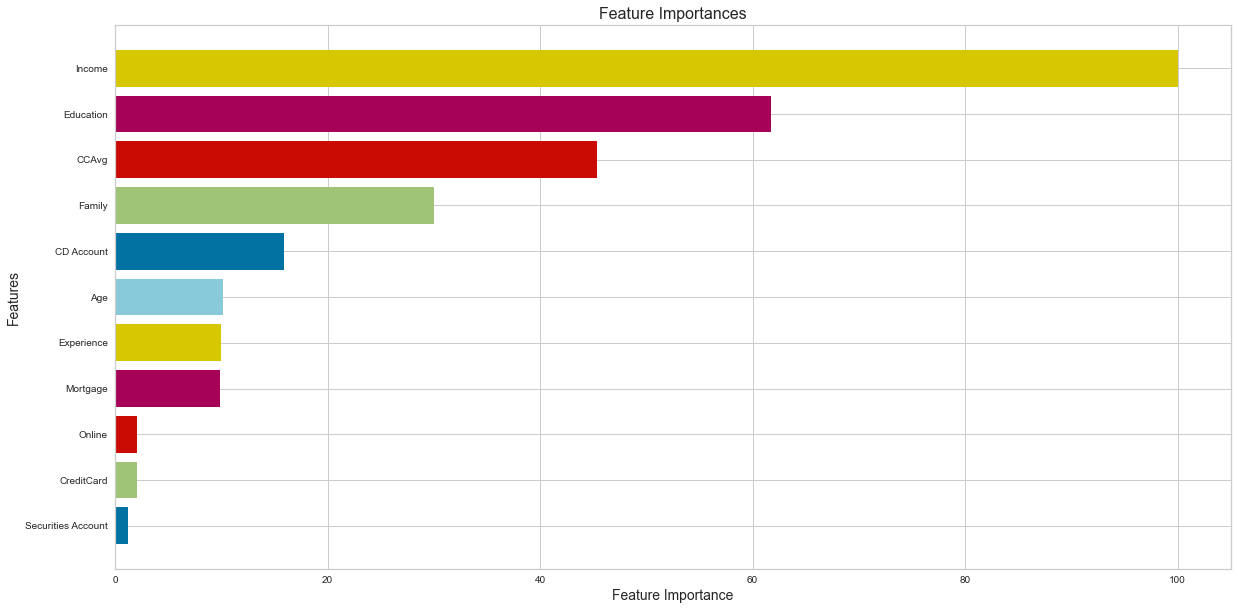

In [51]:
from yellowbrick.model_selection import FeatureImportances

figure = plt.figure(figsize=(20,10))

viz = FeatureImportances(selector.estimator)
viz.fit(X,y)
plt.xlabel('Feature Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

#### X , y split will be done again basis the feature selected

In [52]:
X = X[features_selected]
y= df_loan['Personal Loan']
X.shape, y.shape

((5000, 4), (5000,))

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=100)

In [54]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

naive.fit(X_train, y_train)

GaussianNB()

In [55]:
y_train_pred = naive.predict(X_train)
y_test_pred = naive.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

accuracy_score(y_train, y_train_pred)

0.914

In [57]:
accuracy_score(y_test, y_test_pred) 

0.9073333333333333

## Model 2

### Feature Selection

- Since model 1 is underfitting will do feature selction from the 'features_selected' and check the accuracy again

In [58]:
features_selected

['Income', 'Family', 'CCAvg', 'Education']

In [59]:
features_selected_1 = ['Income', 'Family', 'CCAvg']
features_selected_1

['Income', 'Family', 'CCAvg']

In [60]:
X = X[features_selected_1]
y= df_loan['Personal Loan']
X.shape, y.shape

((5000, 3), (5000,))

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [62]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

naive.fit(X_train, y_train)

GaussianNB()

In [63]:
y_train_pred = naive.predict(X_train)
y_test_pred = naive.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

accuracy_score(y_train, y_train_pred)

0.9

In [65]:
accuracy_score(y_test, y_test_pred)

0.8808

### Plotting Confusin Matrix

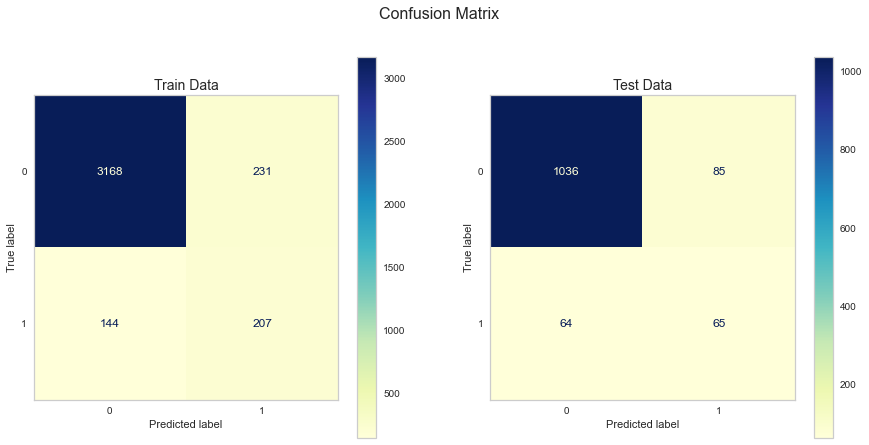

In [67]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [83]:
from sklearn.metrics import classification_report


Train_classification_report= classification_report(y_train, y_train_pred)
print(Train_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3399
           1       0.47      0.59      0.52       351

    accuracy                           0.90      3750
   macro avg       0.71      0.76      0.73      3750
weighted avg       0.91      0.90      0.90      3750



In [85]:
Test_classification_report= classification_report(y_test, y_test_pred)
print(Test_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1121
           1       0.43      0.50      0.47       129

    accuracy                           0.88      1250
   macro avg       0.69      0.71      0.70      1250
weighted avg       0.89      0.88      0.88      1250



### Observations:

**Model-1** score: 

It's **Underfitting** 

**0.8805**

**0.894**

**Model-2** score: 

Accuracy have improved, have **implemented select from model technique** achieved below score:

**0.914**

**0.9073**

**Model-3** Score: 

Changed Test size & Random State and dropped **Education** variable to check for higher accuracy. However Test Train accuracy not improved much. 

**0.9**

**0.8888**

Train Data:

Model predicted 3168 instances correctly for negative class while 207 instances were predicted correctly for positive class.
Model identified 144 instance negative but in actual they were positive.
Model identified 231 instances positive but in actual they were negative.
Test Data:

Test Data:
Model predicted 1036 instances correctly for negative class while 65 instances were predicted correctly for positive class.
Model identified 85 instances negative but in actual they were positive.
Model identified 64 instances positive but in actual they were negative.